In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Tweets.csv")

In [3]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [4]:
import re

In [5]:
import nltk

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
!pip install wordseg

In [8]:
#from wordseg import segment

In [9]:
from nltk.corpus import stopwords

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stopwords = stopwords.words('english')

In [12]:
from tqdm import tqdm

In [13]:
df['text']=df['text'].apply(lambda t : re.sub(r'@[A-Za-z0-9]+','',t))

In [14]:
df['text']=df['text'].apply(lambda t : re.sub('https?://[A-Za-z0-9./]+','',t))

In [15]:
df['text'] = df['text'].apply(lambda t : t.lower())

In [16]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,what said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus you've added commercials to the experien...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,i didn't today... must mean i need to take an...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"it's really aggressive to blast obnoxious ""en...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,thank you we got on a different flight to chi...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,leaving over 20 minutes late flight. no warni...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,please bring american airlines to #blackberry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"you have my money, you change my flight, and ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [17]:
df['text'][3]

' it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

In [18]:
df['text']=df['text'].apply(lambda t: re.sub("\"","",t))

In [19]:
df['text'][3]

" it's really aggressive to blast obnoxious entertainment in your guests' faces &amp; they have little recourse"

In [20]:
!pip install contractions

     |████████████████████████████████| 284 kB 41.9 MB/s 
     |████████████████████████████████| 321 kB 53.4 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85448 sha256=514113fb25dea23fa69a69073db22869007443e675d8a65e4d3737b6052fc8c4
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [21]:
import contractions

In [22]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [23]:
import nltk
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [24]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [25]:
def proc2_mail(x):
    sent = []
    for i in sent_tokenize(x):
      i = re.sub("\n","",i)
      i = re.sub("\r","",i)
      i=contractions.fix(i)
      i = re.sub('(<[\w\s]*/?>)',"",i)
      i = re.sub('^((ftp|http|https):\/\/)?(www.)?(?!.*(ftp|http|https|www.))[a-zA-Z0-9_-]+(\.[a-zA-Z]+)+((\/)[\w#]+)*(\/\w+\?[a-zA-Z0-9_]+=\w+(&[a-zA-Z0-9_]+=\w+)*)?$',"url",i)
      i = re.sub('\d+',"",i)
      i = re.sub("-","",i)
      i = re.sub("\(","",i)
      i = re.sub("\)","",i)
      #i = re.sub("\.","",i)
      i = re.sub("\,","",i)
      i = re.sub("\!","",i)
      i = re.sub("\:","",i)
      #i = re.sub("\;","",i)
      i = re.sub("\/","",i)
      i = i.replace("#","")
      i = i.replace("'","")
      #i = re.sub("\?","",i)
      i = i.replace(u'\xa0', u' ')
      i = re.sub('(?<=")([^"]+)(?=")"', '', i)
      i = emoji_pattern.sub(r'',i)
      i = i.lower()
      if i not in stop_words:
          sent.append(i)

    clnd_eml = []
    for ii in sent:
      #tmp=[]
      for j in word_tokenize(ii):
        clnd_eml.append(j)
      #clnd_eml.append(tmp)
    return clnd_eml

In [26]:
def proc_mail(x):
    sent = []
    for i in sent_tokenize(x):
      i = re.sub("\n","",i)
      i = re.sub("\r","",i)
      i=contractions.fix(i)
      i = re.sub('(<[\w\s]*/?>)',"",i)
      i = re.sub('^((ftp|http|https):\/\/)?(www.)?(?!.*(ftp|http|https|www.))[a-zA-Z0-9_-]+(\.[a-zA-Z]+)+((\/)[\w#]+)*(\/\w+\?[a-zA-Z0-9_]+=\w+(&[a-zA-Z0-9_]+=\w+)*)?$',"url",i)
      i = re.sub('\d+',"",i)
      i = re.sub("-","",i)
      i = re.sub("\(","",i)
      i = re.sub("\)","",i)
      #i = re.sub("\.","",i)
      i = re.sub("\,","",i)
      i = re.sub("\!","",i)
      i = re.sub("\:","",i)
      #i = re.sub("\;","",i)
      i = re.sub("\/","",i)
      i = i.replace("#","")
      i = i.replace("'","")
      #i = re.sub("\?","",i)
      i = i.replace(u'\xa0', u' ')
      i = re.sub('(?<=")([^"]+)(?=")"', '', i)
      i = emoji_pattern.sub(r'',i)
      i = i.lower()
      if i not in stop_words:
          sent.append(i)

    clnd_eml = []
    for ii in sent:
      tmp=[]
      for j in word_tokenize(ii):
        tmp.append(j)
      clnd_eml.append(tmp)
    return clnd_eml

In [27]:
df['text1']=df['text'].apply(proc_mail)

In [28]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text1
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,what said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),"[[what, said, .]]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus you've added commercials to the experien...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"[[plus, you, have, added, commercials, to, the..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,i didn't today... must mean i need to take an...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),"[[i, did, not, today, ..., must, mean, i, need..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,it's really aggressive to blast obnoxious ent...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"[[it, is, really, aggressive, to, blast, obnox..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),"[[and, it, is, a, really, big, bad, thing, abo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,thank you we got on a different flight to chi...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,"[[thank, you, we, got, on, a, different, fligh..."
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,leaving over 20 minutes late flight. no warni...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,"[[leaving, over, minutes, late, flight, .], [n..."
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,please bring american airlines to #blackberry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,"[[please, bring, american, airlines, to, black..."
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"you have my money, you change my flight, and ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),"[[you, have, my, money, you, change, my, fligh..."


In [29]:
df['text2']=df['text'].apply(proc2_mail)

In [30]:
vocab = []
for ind in df.index:
  for i in df['text1'][ind]:
    vocab.append(i)


In [31]:
#vocab

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(vocab, min_count=1, size=100)

In [34]:
flattened_vocab = [val for sublist in vocab for val in sublist]

In [35]:
df['text2'][9]

['it',
 'was',
 'amazing',
 'and',
 'arrived',
 'an',
 'hour',
 'early',
 '.',
 'you',
 'are',
 'too',
 'good',
 'to',
 'me',
 '.']

In [36]:
#mod

In [37]:
def transform_vec(x):
  return [model.wv.get_vector(i) for i in x]

In [38]:
df['wv']=df['text2'].apply(transform_vec)

In [39]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text1,text2,wv
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,what said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),"[[what, said, .]]","[what, said, .]","[[-0.7311451, -0.048761632, -0.12447308, 0.118..."
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus you've added commercials to the experien...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"[[plus, you, have, added, commercials, to, the...","[plus, you, have, added, commercials, to, the,...","[[-0.39811096, -0.085406855, 0.48819157, -0.17..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,i didn't today... must mean i need to take an...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),"[[i, did, not, today, ..., must, mean, i, need...","[i, did, not, today, ..., must, mean, i, need,...","[[-0.4807601, -0.13368319, 0.4886961, -0.31379..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,it's really aggressive to blast obnoxious ent...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"[[it, is, really, aggressive, to, blast, obnox...","[it, is, really, aggressive, to, blast, obnoxi...","[[-0.73192793, -0.6184962, 0.019957332, -0.182..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),"[[and, it, is, a, really, big, bad, thing, abo...","[and, it, is, a, really, big, bad, thing, abou...","[[-0.84260476, -0.37014526, 1.1540521, -0.4102..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,thank you we got on a different flight to chi...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,"[[thank, you, we, got, on, a, different, fligh...","[thank, you, we, got, on, a, different, flight...","[[-0.48686376, 0.5398515, 0.96806145, -0.10577..."
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,leaving over 20 minutes late flight. no warni...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,"[[leaving, over, minutes, late, flight, .], [n...","[leaving, over, minutes, late, flight, ., no, ...","[[-0.4404616, -0.14501059, 0.49340612, -0.2543..."
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,please bring american airlines to #blackberry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,"[[please, bring, american, airlines, to, black...","[please, bring, american, airlines, to, blackb...","[[-1.0092492, 0.047171388, 0.2306362, 0.072189..."
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"you have my money, you change my flight, and ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),"[[you, have, my, money, you, change, my, fligh...","[you, have, my, money, you, change, my, flight...","[[-0.96363235, 0.4855501, -0.08399214, 0.86090..."


In [40]:
X = df['wv']

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
import numpy as np

In [43]:
rev_len=[len(list(df['wv'][i])) for i in df['wv'].index]
MAX_LEN = max(rev_len)
print('maximum length of Reviews:', MAX_LEN)

maximum length of Reviews: 41


In [44]:
#X_pd = pad_sequences(X.values, value=np.zeros(100), padding='post', maxlen=50)

In [45]:
len(df['wv'][0])

3

In [46]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text1,text2,wv
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,what said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),"[[what, said, .]]","[what, said, .]","[[-0.7311451, -0.048761632, -0.12447308, 0.118..."
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus you've added commercials to the experien...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"[[plus, you, have, added, commercials, to, the...","[plus, you, have, added, commercials, to, the,...","[[-0.39811096, -0.085406855, 0.48819157, -0.17..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,i didn't today... must mean i need to take an...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),"[[i, did, not, today, ..., must, mean, i, need...","[i, did, not, today, ..., must, mean, i, need,...","[[-0.4807601, -0.13368319, 0.4886961, -0.31379..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,it's really aggressive to blast obnoxious ent...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"[[it, is, really, aggressive, to, blast, obnox...","[it, is, really, aggressive, to, blast, obnoxi...","[[-0.73192793, -0.6184962, 0.019957332, -0.182..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),"[[and, it, is, a, really, big, bad, thing, abo...","[and, it, is, a, really, big, bad, thing, abou...","[[-0.84260476, -0.37014526, 1.1540521, -0.4102..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,thank you we got on a different flight to chi...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,"[[thank, you, we, got, on, a, different, fligh...","[thank, you, we, got, on, a, different, flight...","[[-0.48686376, 0.5398515, 0.96806145, -0.10577..."
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,leaving over 20 minutes late flight. no warni...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,"[[leaving, over, minutes, late, flight, .], [n...","[leaving, over, minutes, late, flight, ., no, ...","[[-0.4404616, -0.14501059, 0.49340612, -0.2543..."
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,please bring american airlines to #blackberry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,"[[please, bring, american, airlines, to, black...","[please, bring, american, airlines, to, blackb...","[[-1.0092492, 0.047171388, 0.2306362, 0.072189..."
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"you have my money, you change my flight, and ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),"[[you, have, my, money, you, change, my, fligh...","[you, have, my, money, you, change, my, flight...","[[-0.96363235, 0.4855501, -0.08399214, 0.86090..."


In [47]:
X

0        [[-0.7311451, -0.048761632, -0.12447308, 0.118...
1        [[-0.39811096, -0.085406855, 0.48819157, -0.17...
2        [[-0.4807601, -0.13368319, 0.4886961, -0.31379...
3        [[-0.73192793, -0.6184962, 0.019957332, -0.182...
4        [[-0.84260476, -0.37014526, 1.1540521, -0.4102...
                               ...                        
14635    [[-0.48686376, 0.5398515, 0.96806145, -0.10577...
14636    [[-0.4404616, -0.14501059, 0.49340612, -0.2543...
14637    [[-1.0092492, 0.047171388, 0.2306362, 0.072189...
14638    [[-0.96363235, 0.4855501, -0.08399214, 0.86090...
14639    [[-0.80373704, 0.038916364, 0.17018737, 0.2365...
Name: wv, Length: 14640, dtype: object

In [48]:
np.array(X[0]).shape

(3, 100)

In [49]:
len(X)

14640

In [50]:
for i in df.index:
  while(len(df['wv'][i]) < MAX_LEN):
    df['wv'][i].append(np.zeros(100))

In [51]:
len(df['wv'][4])

41

In [52]:
Xpd = df['wv']

In [53]:
Xpd

0        [[-0.7311451, -0.048761632, -0.12447308, 0.118...
1        [[-0.39811096, -0.085406855, 0.48819157, -0.17...
2        [[-0.4807601, -0.13368319, 0.4886961, -0.31379...
3        [[-0.73192793, -0.6184962, 0.019957332, -0.182...
4        [[-0.84260476, -0.37014526, 1.1540521, -0.4102...
                               ...                        
14635    [[-0.48686376, 0.5398515, 0.96806145, -0.10577...
14636    [[-0.4404616, -0.14501059, 0.49340612, -0.2543...
14637    [[-1.0092492, 0.047171388, 0.2306362, 0.072189...
14638    [[-0.96363235, 0.4855501, -0.08399214, 0.86090...
14639    [[-0.80373704, 0.038916364, 0.17018737, 0.2365...
Name: wv, Length: 14640, dtype: object

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
np.array(Xpd[0]).shape

(41, 100)

In [56]:
Xpd_v = Xpd.values

In [57]:
Xpd_v.shape

(14640,)

In [58]:
Xpd_v = np.stack(Xpd_v)

In [59]:
Xpd_v.shape

(14640, 41, 100)

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


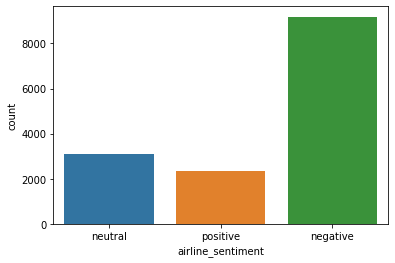

In [61]:
sns.countplot(df['airline_sentiment'])
plt.show()

In [62]:
dic = {'negative':0, 'neutral':1, 'positive':2}

In [63]:
y_int = df['airline_sentiment'].map(dic)

In [64]:
y = pd.get_dummies(df['airline_sentiment'], prefix='sent')

In [65]:
#y=df['airline_sentiment'].map(dic)

In [66]:
y

,sent_negative,sent_neutral,sent_positive
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
14635,0,0,1
14636,1,0,0
14637,0,1,0
14638,1,0,0


In [67]:
y_int

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [68]:
y=y.values

In [69]:
X_train, X_test, y_train, y_test = train_test_split(Xpd_v, y, test_size=0.3, random_state=123)

In [70]:
y_test_df = pd.DataFrame(y_test)

In [71]:
y_test_df

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4387,0,0,1
4388,1,0,0
4389,1,0,0
4390,0,1,0


In [72]:
y_test_int = np.argmax(y_test_df.values, axis=1)

In [73]:
print(y_test_int)

[0 0 0 ... 0 1 1]


In [74]:
X_train.shape

(10248, 41, 100)

In [75]:
X_test.shape

(4392, 41, 100)

In [76]:
y_train.shape

(10248, 3)

In [77]:
import tensorflow as tf

In [78]:
import tensorflow as tf

In [79]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [80]:
UNITS = MAX_LEN
BATCH_SIZE = 32
EPOCHS=50



model = Sequential()
model.add(LSTM(UNITS, return_sequences=True,input_shape=(MAX_LEN,100)))
model.add(LSTM(UNITS, return_sequences=True,input_shape=(MAX_LEN,100)))
model.add(LSTM(UNITS, return_sequences=True,input_shape=(MAX_LEN,100)))
model.add(GRU(UNITS, return_sequences=True,input_shape=(MAX_LEN,100)))
model.add(LSTM(UNITS))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 41, 41)            23288     
                                                                 
 lstm_1 (LSTM)               (None, 41, 41)            13612     
                                                                 
 lstm_2 (LSTM)               (None, 41, 41)            13612     
                                                                 
 gru (GRU)                   (None, 41, 41)            10332     
                                                                 
 lstm_3 (LSTM)               (None, 41)                13612     
                                                                 
 dense (Dense)               (None, 3)                 126       
                                                                 
Total params: 74,582
Trainable params: 74,582
Non-traina

In [81]:
LSTM_early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [82]:
X_train.shape

(10248, 41, 100)

In [83]:
X_test.shape

(4392, 41, 100)

In [84]:
y_train.shape

(10248, 3)

In [85]:
y_test.shape

(4392, 3)

In [86]:
model_history = model.fit(X_train, y_train,
                         batch_size=BATCH_SIZE,
                         epochs=EPOCHS,
                         validation_data=(X_test, y_test),
                         callbacks=[LSTM_early_stop],
                         verbose=1)

Epoch 1/50
321/321 [==============================] - 49s 124ms/step - loss: 0.8202 - accuracy: 0.6524 - val_loss: 0.8352 - val_accuracy: 0.6685
Epoch 2/50
321/321 [==============================] - 37s 116ms/step - loss: 0.7553 - accuracy: 0.6852 - val_loss: 0.6822 - val_accuracy: 0.7250
Epoch 3/50
321/321 [==============================] - 37s 115ms/step - loss: 0.6950 - accuracy: 0.7074 - val_loss: 0.6706 - val_accuracy: 0.7186
Epoch 4/50
321/321 [==============================] - 37s 115ms/step - loss: 0.6725 - accuracy: 0.7135 - val_loss: 0.6293 - val_accuracy: 0.7427
Epoch 5/50
321/321 [==============================] - 37s 116ms/step - loss: 0.6595 - accuracy: 0.7224 - val_loss: 0.6645 - val_accuracy: 0.7357
Epoch 6/50
321/321 [==============================] - 37s 115ms/step - loss: 0.6463 - accuracy: 0.7313 - val_loss: 0.6298 - val_accuracy: 0.7300
Epoch 7/50
321/321 [==============================] - 37s 115ms/step - loss: 0.6397 - accuracy: 0.7313 - val_loss: 0.6210 - val_ac

In [87]:
y_pred = model.predict(X_test)

In [88]:
y_pred[40:60]

array([[0.907995  , 0.00737614, 0.0846289 ],
       [0.86114997, 0.01360787, 0.12524219],
       [0.9176731 , 0.07717684, 0.00515003],
       [0.45727643, 0.3189802 , 0.22374344],
       [0.99405044, 0.00444569, 0.00150387],
       [0.00856967, 0.19042663, 0.8010037 ],
       [0.9942517 , 0.00423392, 0.00151438],
       [0.8214831 , 0.1653266 , 0.01319039],
       [0.6458137 , 0.10579047, 0.24839582],
       [0.81148183, 0.13893616, 0.04958202],
       [0.7735356 , 0.11121226, 0.11525201],
       [0.86195976, 0.12943569, 0.0086046 ],
       [0.99213725, 0.00628218, 0.00158054],
       [0.8306925 , 0.01125279, 0.15805472],
       [0.60127187, 0.15881266, 0.23991552],
       [0.9932308 , 0.00524327, 0.00152595],
       [0.91385543, 0.01919506, 0.0669496 ],
       [0.8061833 , 0.02119158, 0.17262506],
       [0.869369  , 0.02536711, 0.10526395],
       [0.50836855, 0.03739061, 0.4542408 ]], dtype=float32)

In [90]:
y_pred

array([[0.9936249 , 0.00375236, 0.00262273],
       [0.93808705, 0.03912263, 0.02279039],
       [0.90586317, 0.07560875, 0.01852811],
       ...,
       [0.9950176 , 0.00346128, 0.00152108],
       [0.06315366, 0.9328699 , 0.0039764 ],
       [0.03036516, 0.9499952 , 0.01963962]], dtype=float32)

In [91]:
y_test

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

In [92]:
from sklearn.metrics import accuracy_score, f1_score

In [93]:
from sklearn.metrics import balanced_accuracy_score

In [94]:
y_pred_int = np.argmax(y_pred, axis=1)

In [95]:
print(accuracy_score(y_test_int, y_pred_int))

0.770264116575592


In [96]:
print(balanced_accuracy_score(y_test_int, y_pred_int))

0.6656839856293013


In [102]:
from sklearn.metrics import confusion_matrix, classification_report

In [101]:
print(confusion_matrix(y_test_int, y_pred_int))

[[2508  168   99]
 [ 365  482   93]
 [ 233   51  393]]


In [103]:
print(classification_report(y_test_int, y_pred_int))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2775
           1       0.69      0.51      0.59       940
           2       0.67      0.58      0.62       677

    accuracy                           0.77      4392
   macro avg       0.72      0.67      0.69      4392
weighted avg       0.76      0.77      0.76      4392

